This notebook will be used for the IBM Data Science capstone 

In [4]:
import pandas as pd
import numpy as np
import folium
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
from sklearn import preprocessing
from scipy import stats
from sklearn.metrics import matthews_corrcoef

In [5]:
print ('Hello Capstone Project Course!')

Hello Capstone Project Course!


In [6]:
df = pd.read_csv('Collisions.csv' , low_memory = False)

In [7]:
pd.set_option('display.max_columns', None)

In [8]:
df.shape

(221738, 40)

In [9]:
df.shape

(221738, 40)

In [10]:
#plots confusion matrix 
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    #PLOT
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [11]:
'''
Drops unique identifier features that have no 
significance to our model and returns a 
new data frame. 
'''

def drop_identifiers():
    global df
    df.drop('EXCEPTRSNCODE', axis = 1, inplace = True)
    df.drop('EXCEPTRSNDESC', axis = 1, inplace = True)
    df.drop('OBJECTID', axis = 1, inplace = True)
    df.drop('INCKEY', axis = 1, inplace = True)
    df.drop('REPORTNO', axis = 1, inplace = True)
    df.drop('STATUS', axis = 1, inplace = True)
    df.drop('INTKEY', axis = 1, inplace = True)
    df.drop('PEDROWNOTGRNT', axis = 1, inplace = True)
    df.drop('ST_COLDESC', axis = 1, inplace = True)
    df.drop('SDOTCOLNUM', axis = 1 , inplace = True)
    df.drop('COLDETKEY', axis = 1, inplace = True)
    df.drop('SDOT_COLCODE' , axis = 1, inplace = True)
    df.drop('ST_COLCODE', axis = 1, inplace = True)
    df.drop('CROSSWALKKEY', axis = 1, inplace = True)
    df.drop('SEGLANEKEY', axis = 1, inplace = True)
    df.drop('SDOT_COLDESC', axis = 1, inplace = True)
    return df

In [12]:
''''
Column 'SEVERITYCODE' gives us the informaton on severity that we need
'SEVERITYDESC', 'INJURIES', 'Fatalities','SERIOUSINJURIES'
are all directly correlated with our target variable
Thus we will drop them from the dataframe to avoid bad predictions. 
Returns new dataframe

'''

def drop_corr_features():
    global df
    df.drop('SEVERITYDESC', axis = 1, inplace = True)
    df.drop('INJURIES', axis = 1, inplace = True)
    df.drop('SERIOUSINJURIES', axis = 1, inplace = True)
    df.drop('FATALITIES', axis = 1, inplace = True)

    #We see that junciton type gives us more information than ADRTYPE
    #dropping ADRTYPE
    
    df.drop('ADDRTYPE', axis = 1 , inplace = True)
    return df

In [13]:
'''
Drops a row if that row contains an nan value for the features
‘UNDERINFL’, ‘LIGHTCOND’, ‘ROADCOND’, ‘WEATHER’, ‘COLLISIONTYPE’,
& ‘SEVERITYCODE’. Returns a new data frame. 
'''

def drop_na():
    global df
    df.dropna(subset = ['UNDERINFL'], inplace=True)
    df.dropna(subset = ['LIGHTCOND'], inplace=True)
    df.dropna(subset = ['ROADCOND'], inplace=True)
    df.dropna(subset = ['WEATHER'], inplace=True)
    df.dropna(subset = ['COLLISIONTYPE'], inplace=True)
    df.dropna(subset = ['SEVERITYCODE'], inplace=True)
    return df

In [14]:
'''
Fills the nan values for the features ‘SPEEDING’ and ‘INATTENTIONIND’ 
with 0 and returns a new data frame. 
'''

def fill_na():
    global df
    df.SPEEDING.fillna(0, inplace = True)
    df.INATTENTIONIND.fillna(0, inplace = True)
    return df

In [15]:
'''
Converts the features ‘UNDERINFL’ , ‘SEVERITYCODE’, ‘SPEEDING’, 
‘INATTENTIONIND’,& ‘HITPARKEDCAR’ to a binary dummy variable since
there are string values of ‘Y’ & ‘N’. Returns a new data frame. 
'''

def convert_to_dummy():
    global df
    df['UNDERINFL'].replace({'N':0, 'Y':1} , inplace = True)
    df['UNDERINFL'].replace({0:0, 1:1} , inplace = True)
    
    df['SEVERITYCODE'].replace(1 , 0, inplace=True)
    df['SEVERITYCODE'].replace(2 , 0, inplace=True)
    df['SEVERITYCODE'].replace(3 , 1, inplace=True)
    df['SEVERITYCODE'].replace(4 , 1, inplace=True)
    df['SEVERITYCODE'] = df.SEVERITYCODE.astype(int)
    
    df['SPEEDING'].replace({0:0, 'Y':1} , inplace = True)
    
    df['INATTENTIONIND'].replace({0:0, 'Y':1} , inplace = True)
    
    df['HITPARKEDCAR'].replace({'N':0, 'Y':1} , inplace = True)

    return df

In [16]:
'''
Drops a row if contains an ‘Unknown’ or ‘Other’ value
for the features ‘COLLISIONTYPE’, ‘LIGHTCOND’, ‘WEATHER’,
‘ROADCOND’,& ‘JUNCTIONTYPE’. Returns a new data frame. 
'''

def drop_unknown_other():
    global df
    df.drop(df.index[df['COLLISIONTYPE'] == 'Other'], inplace = True)
    df.drop(df.index[df['LIGHTCOND'] == 'Unknown'], inplace = True)
    df.drop(df.index[df['LIGHTCOND'] == 'Other'], inplace = True)
    df.drop(df.index[df['WEATHER'] == 'Unknown'], inplace = True)
    df.drop(df.index[df['WEATHER'] == 'Other'], inplace = True)
    df.drop(df.index[df['ROADCOND'] == 'Other'], inplace = True)
    df.drop(df.index[df['ROADCOND'] == 'Unknown'], inplace = True)
    df.drop(df.index[df['JUNCTIONTYPE'] == 'Unknown'], inplace = True)
    return df

In [17]:
'''
Creates new (binary) columns indicating the presence of 
each possible value in a particular column. 
The features that are encoded include ‘COLLISIONTYPE’ ,
‘LIGHTCOND’ , ‘WEATHER’, ‘ROADCOND’,
& ‘JUNCTIONTYPE’. Returns a new data frame. 
'''

def one_hot_encode():
    global df
    COLLISIONTYPE_dummies = pd.get_dummies(df['COLLISIONTYPE'], prefix = 'CT')
    df = pd.concat([df, COLLISIONTYPE_dummies], axis = 1)
    df.drop('COLLISIONTYPE', axis = 1, inplace = True)

    LIGHTCOND_dummies = pd.get_dummies(df['LIGHTCOND'], prefix = 'LC')
    df = pd.concat([df, LIGHTCOND_dummies], axis = 1)
    df.drop('LIGHTCOND', axis = 1, inplace = True)

    WEATHER_dummies = pd.get_dummies(df['WEATHER'], prefix = 'W')
    df = pd.concat([df, WEATHER_dummies], axis = 1)
    df.drop('WEATHER', axis = 1, inplace = True)
    df.head()

    ROADCOND_dummies = pd.get_dummies(df['ROADCOND'], prefix = 'RC')
    df = pd.concat([df, ROADCOND_dummies], axis = 1)
    df.drop('ROADCOND', axis = 1, inplace = True)
    df.head()

    JUNCTIONTYPE_dummies = pd.get_dummies(df['JUNCTIONTYPE'], prefix = 'JT')
    df = pd.concat([df, JUNCTIONTYPE_dummies], axis = 1)
    df.drop('JUNCTIONTYPE', axis = 1, inplace = True)
    df.head()
    return df
    

In [18]:
    #create new data frame with just lat,long, and adr
    
    df.rename(columns={"X": "LONG", "Y": "LAT"} ,inplace= True)
    df_Area = df['LOCATION']
    df_Long = df['LONG']
    df_Lat = df['LAT']
    df_Locations = pd.concat([df_Area,df_Lat, df_Long], axis = 1)
    df_Locations.dropna(subset = ['LAT'], inplace=True)
    df_Locations.dropna(subset = ['LONG'], inplace=True)
    df_Locations.rename(columns={"LOCATION": "ADR"} ,inplace= True)

In [19]:
#top 20% most frequent accident locations in seattle


location=df_Locations.groupby(['LAT','LONG','ADR']).size().reset_index(name='count').sort_values(by='count',ascending=False)
location=location[location['count']>5]
location['color']=location['count'].apply(lambda count:"#3186cc" if count>58
                                         else "none")

location['size']=location['count'].apply(lambda count:6 if count>58
                                        else 0)


location.drop(location.index[location['count'] <42], inplace = True)

In [20]:
#plot circle marker map

m=folium.Map([47.6080,-122.3351],tiles='Stamen Toner',zoom_start=12)

for lat,lon,adr,color,count,size in zip(location['LAT'],location['LONG'],location['ADR'],location['color'],location['count'],location['size']):
     folium.CircleMarker([lat, lon],  
                            popup=adr,
                            radius=size,
                            color='black',
                            fill=True,
                            fill_opacity=0.7,
                            fill_color=color,
                           ).add_to(m)

m

In [21]:
m.save('top20%_collisions_frequency.html')

In [22]:
df['SEVERITYCODE'].value_counts()

1     137776
2      58842
0      21656
2b      3111
3        352
Name: SEVERITYCODE, dtype: int64

In [23]:
#create new data frame with only fatal accidents
fatal = df['SEVERITYCODE'] == '3'

In [24]:
filtered_df = df[fatal]

In [25]:
#now add the necessary features
df_Areaf = filtered_df['LOCATION']
df_Longf = filtered_df['LONG']
df_Latf = filtered_df['LAT']
df_Locationsf = pd.concat([df_Areaf,df_Latf, df_Longf], axis = 1)
df_Locationsf.dropna(subset = ['LAT'], inplace=True)
df_Locationsf.dropna(subset = ['LONG'], inplace=True)
df_Locationsf.rename(columns={"LOCATION": "ADR"} ,inplace= True)


In [26]:
# count locations with the most fatal accidents

fatalitylocations=df_Locationsf.groupby(['LAT','LONG','ADR']).size().reset_index(name='count').sort_values(by='count',ascending=False)
fatalitylocations['color']=fatalitylocations['count'].apply(lambda count:'yellow' if count>0
                                         else "none")

fatalitylocations['size']=fatalitylocations['count'].apply(lambda count:6 if count>0
                                        else 0)
fatalitylocations

,LAT,LONG,ADR,count,color,size
203,47.634735,-122.343472,AURORA AVE N BETWEEN GARFIELD ST AND HOWE ST,3,yellow,6
219,47.643120,-122.344071,WESTLAKE AVE N BETWEEN HALLADAY ST AND NEWELL ST,3,yellow,6
123,47.589746,-122.337486,ALASKAN WY VI SB BETWEEN ALASKAN WY VI SB EFR ...,3,yellow,6
10,47.519422,-122.279742,M L KING JR ER WAY S BETWEEN S DIRECTOR ST AND...,3,yellow,6
250,47.668674,-122.388861,NW MARKET ST BETWEEN 24TH AVE NW AND 26TH AVE NW,2,yellow,6
...,...,...,...,...,...,...
111,47.579813,-122.331629,S LANDER ST BETWEEN OCCIDENTAL AVE S AND 3RD A...,1,yellow,6
110,47.579809,-122.325977,6TH AVE S AND S LANDER ST,1,yellow,6
109,47.578712,-122.339983,EAST MARGINAL WAY S BETWEEN S STACY ST AND S H...,1,yellow,6
108,47.578626,-122.311597,BEACON AVE S AND S MCCLELLAN ST,1,yellow,6


In [27]:
'''
checks if the locations in the fatalitylocations data frame
are in the frequent locations data frame. It then adds a binary 
boolean value column to the fatalitylocations data frame indicating 1 
(if it’s in the frequent locations data frame) and 
0 (if it’s not) 
'''

freqfatal = fatalitylocations.ADR.isin(location.ADR).astype(int)
df_freqfatal = pd.concat([fatalitylocations, freqfatal], axis = 1)

In [28]:
df_freqfatal.columns = ["LAT", "LONG","ADR","count","color","size","freq"]
df_freqfatal

,LAT,LONG,ADR,count,color,size,freq
203,47.634735,-122.343472,AURORA AVE N BETWEEN GARFIELD ST AND HOWE ST,3,yellow,6,1
219,47.643120,-122.344071,WESTLAKE AVE N BETWEEN HALLADAY ST AND NEWELL ST,3,yellow,6,1
123,47.589746,-122.337486,ALASKAN WY VI SB BETWEEN ALASKAN WY VI SB EFR ...,3,yellow,6,1
10,47.519422,-122.279742,M L KING JR ER WAY S BETWEEN S DIRECTOR ST AND...,3,yellow,6,1
250,47.668674,-122.388861,NW MARKET ST BETWEEN 24TH AVE NW AND 26TH AVE NW,2,yellow,6,1
...,...,...,...,...,...,...,...
111,47.579813,-122.331629,S LANDER ST BETWEEN OCCIDENTAL AVE S AND 3RD A...,1,yellow,6,0
110,47.579809,-122.325977,6TH AVE S AND S LANDER ST,1,yellow,6,1
109,47.578712,-122.339983,EAST MARGINAL WAY S BETWEEN S STACY ST AND S H...,1,yellow,6,0
108,47.578626,-122.311597,BEACON AVE S AND S MCCLELLAN ST,1,yellow,6,0


In [29]:
#drop row if it is not in frequent location dataframe
df_freqfatal.drop(df_freqfatal.index[df_freqfatal['freq'] == 0], inplace = True)

#drop the boolean column from the dataframe
df_freqfatal.drop('freq', axis = 1, inplace = True)

In [30]:
#assign color and size to the dataframe
df_freqfatal['color']=df_freqfatal['count'].apply(lambda count:'red' if count>0
                                         else "none")

df_freqfatal['size']=df_freqfatal['count'].apply(lambda count:6 if count>0
                                        else 0)

In [31]:
#plot the circle marker map

ff=folium.Map([47.6080,-122.3351],tiles='Stamen Toner',zoom_start=12)

for lat,lon,adr,color,count,size in zip(df_freqfatal['LAT'],df_freqfatal['LONG'],df_freqfatal['ADR'],
                                        df_freqfatal['color'],df_freqfatal['count'],df_freqfatal['size']):
     folium.CircleMarker([lat, lon],  
                            popup=adr,
                            radius=size,
                            color='black',
                            fill=True,
                            fill_opacity=0.7,
                            fill_color=color,
                           ).add_to(ff)
ff

In [32]:
ff.save('freqfatal.html')

In [33]:
'''
checks if the locations in the original data frame
are in the frequent/fatal locations data frame. It then adds a binary 
boolean value column to the original data frame indicating 1 
(if it’s in the frequent/fatal locations data frame) and 
0 (if it’s not) 
'''

sig_loc = df.LOCATION.isin(df_freqfatal.ADR).astype(int)
df = pd.concat([df,sig_loc], axis = 1)

In [34]:
df.shape

(221738, 41)

In [35]:
#rename the column
df.columns.values[40] = "sig_loc"

In [36]:
# replace string values with ints to get the mean
df.drop(df.index[df['SEVERITYCODE'] == '0'], inplace = True)

In [37]:
df['SEVERITYCODE'].replace('3' , '4', inplace=True)

In [38]:
df.dropna(subset = ['SEVERITYCODE'], inplace=True)
df['SEVERITYCODE'].replace('2b' , '3', inplace=True)
df['SEVERITYCODE'] = df.SEVERITYCODE.astype(int)

In [39]:
df['SEVERITYCODE'].value_counts()

1    137776
2     58842
3      3111
4       352
Name: SEVERITYCODE, dtype: int64

In [40]:
#Lets check to see if frequent and fatal accident locations have an impact on severity code
#mean of the severitycode if the location is a frequent and fatal location

df_temp1 = df.loc[df['sig_loc'] == 1, 'SEVERITYCODE']
df_temp1.mean()

1.4898383029224151

In [41]:
#mean of the severity code if the location is not a frequent and fatal location

df_temp2 = df.loc[df['sig_loc'] == 0, 'SEVERITYCODE']
df_temp2.mean()

1.3249094858797972

In [42]:
#We see the mean value for severity code increase by .08
#We will keep 'sig_loc' as a feature

In [43]:
#call methods to clean the data

drop_identifiers()
drop_corr_features()
drop_na()
fill_na()
convert_to_dummy()
drop_unknown_other()
one_hot_encode()

,LONG,LAT,LOCATION,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,INATTENTIONIND,UNDERINFL,SPEEDING,HITPARKEDCAR,sig_loc,CT_Angles,CT_Cycles,CT_Head On,CT_Left Turn,CT_Parked Car,CT_Pedestrian,CT_Rear Ended,CT_Right Turn,CT_Sideswipe,LC_Dark - No Street Lights,LC_Dark - Street Lights Off,LC_Dark - Street Lights On,LC_Dark - Unknown Lighting,LC_Dawn,LC_Daylight,LC_Dusk,W_Blowing Sand/Dirt,W_Clear,W_Fog/Smog/Smoke,W_Overcast,W_Partly Cloudy,W_Raining,W_Severe Crosswind,W_Sleet/Hail/Freezing Rain,W_Snowing,RC_Dry,RC_Ice,RC_Oil,RC_Sand/Mud/Dirt,RC_Snow/Slush,RC_Standing Water,RC_Wet,JT_At Intersection (but not related to intersection),JT_At Intersection (intersection related),JT_Driveway Junction,JT_Mid-Block (but intersection related),JT_Mid-Block (not related to intersection),JT_Ramp Junction
0,-122.356511,47.517361,17TH AVE SW AND SW ROXBURY ST,0,2,0,0,2,2020/01/19 00:00:00+00,1/19/2020 9:01:00 AM,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,-122.361405,47.702064,HOLMAN RD NW BETWEEN 4TH AVE NW AND 3RD AVE NW,0,2,0,0,2,2005/04/11 00:00:00+00,4/11/2005 6:31:00 PM,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,-122.317414,47.664028,ROOSEVELT WAY NE BETWEEN NE 47TH ST AND NE 50T...,0,2,0,0,2,2013/03/31 00:00:00+00,3/31/2013 2:09:00 AM,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,-122.318234,47.619927,11TH AVE E AND E JOHN ST,0,3,1,0,1,2020/01/06 00:00:00+00,1/6/2020 5:55:00 PM,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
5,-122.333067,47.544302,1ST AV S NB OFF RP BETWEEN 1ST AV S BR NB AND ...,0,2,0,0,2,2019/08/08 00:00:00+00,8/8/2019 12:49:00 PM,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221732,-122.334832,47.522784,1ST AVE S BETWEEN 1ST AVS ON S RP AND OLSON PL SW,0,3,0,0,2,2019/06/18 00:00:00+00,6/18/2019 10:21:00 PM,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
221734,-122.379619,47.668051,BARNES AVE NW BETWEEN 17TH AVE NW AND NW MARKE...,0,2,0,0,2,2019/07/25 00:00:00+00,7/25/2019 10:12:00 AM,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
221735,-122.312837,47.526850,16TH AVE S AND DALLAS AVE S,0,3,0,0,2,2019/07/24 00:00:00+00,7/24/2019 3:35:00 PM,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
221736,-122.285051,47.567923,38TH AVE S AND S ANDOVER ST,0,3,0,0,2,2019/07/07 00:00:00+00,7/7/2019 6:13:00 PM,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [44]:
#drop remaining features that aren't significant
df.drop('INCDATE', axis = 1, inplace = True)
df.drop('LAT', axis = 1, inplace = True)
df.drop('LONG', axis = 1, inplace = True)
df.drop('LOCATION', axis = 1, inplace = True)
df.drop('INCDTTM', axis = 1, inplace = True)
df.head()

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,SPEEDING,HITPARKEDCAR,sig_loc,CT_Angles,CT_Cycles,CT_Head On,CT_Left Turn,CT_Parked Car,CT_Pedestrian,CT_Rear Ended,CT_Right Turn,CT_Sideswipe,LC_Dark - No Street Lights,LC_Dark - Street Lights Off,LC_Dark - Street Lights On,LC_Dark - Unknown Lighting,LC_Dawn,LC_Daylight,LC_Dusk,W_Blowing Sand/Dirt,W_Clear,W_Fog/Smog/Smoke,W_Overcast,W_Partly Cloudy,W_Raining,W_Severe Crosswind,W_Sleet/Hail/Freezing Rain,W_Snowing,RC_Dry,RC_Ice,RC_Oil,RC_Sand/Mud/Dirt,RC_Snow/Slush,RC_Standing Water,RC_Wet,JT_At Intersection (but not related to intersection),JT_At Intersection (intersection related),JT_Driveway Junction,JT_Mid-Block (but intersection related),JT_Mid-Block (not related to intersection),JT_Ramp Junction
0,0,2,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0,2,0,0,2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,2,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,0,3,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
5,0,2,0,0,2,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [45]:
#check the feature types

pd.set_option('display.max_colwidth', None)
df.dtypes

SEVERITYCODE                                            int64
PERSONCOUNT                                             int64
PEDCOUNT                                                int64
PEDCYLCOUNT                                             int64
VEHCOUNT                                                int64
INATTENTIONIND                                          int64
UNDERINFL                                               int64
SPEEDING                                                int64
HITPARKEDCAR                                            int64
sig_loc                                                 int64
CT_Angles                                               uint8
CT_Cycles                                               uint8
CT_Head On                                              uint8
CT_Left Turn                                            uint8
CT_Parked Car                                           uint8
CT_Pedestrian                                           uint8
CT_Rear 

In [46]:
df['SEVERITYCODE'].value_counts()

0    149221
1      2730
Name: SEVERITYCODE, dtype: int64

In [47]:
#Sort by ascending severity code

df['SEVERITYCODE'].value_counts()
df = df.sort_values(by='SEVERITYCODE',ascending=True)
df = df.reset_index(drop=True)
df['SEVERITYCODE'].value_counts()

0    149221
1      2730
Name: SEVERITYCODE, dtype: int64

In [48]:
#drop rows (undersample) of the majority class (non-severe) to match the severe class
#balancing the data set

df.drop(df.index[0:146491],axis = 0, inplace = True)
df = df.reset_index(drop=True)
df['SEVERITYCODE'].value_counts()

1    2730
0    2730
Name: SEVERITYCODE, dtype: int64

In [49]:
#lets check correlation between features & target feature
x = np.array(df['W_Raining']) 
y = np.array(df['RC_Wet'])

stats.pointbiserialr(x, y)

PointbiserialrResult(correlation=0.7699442532710525, pvalue=0.0)

In [50]:
x = np.array(df['RC_Dry']) 
y = np.array(df['W_Clear'])

stats.pointbiserialr(x, y)

PointbiserialrResult(correlation=0.706208925823026, pvalue=0.0)

In [51]:
x = np.array(df['RC_Dry']) 
y = np.array(df['LC_Daylight'])

stats.pointbiserialr(x, y)

PointbiserialrResult(correlation=0.1904301875538833, pvalue=9.410393923326523e-46)

In [52]:
x = np.array(df['W_Snowing']) 
y = np.array(df['RC_Snow/Slush'])

stats.pointbiserialr(x, y)

PointbiserialrResult(correlation=0.5398385603334975, pvalue=0.0)

In [53]:
x = np.array(df['W_Raining']) 
y = np.array(df['RC_Standing Water'])

stats.pointbiserialr(x, y)

PointbiserialrResult(correlation=0.016429318952450832, pvalue=0.22482558904701394)

In [54]:
x = np.array(df['HITPARKEDCAR']) 
y = np.array(df['CT_Parked Car'])

matthews_corrcoef(x, y)

0.08325098967878757

In [55]:
x = np.array(df['CT_Pedestrian']) 
y = np.array(df['PEDCOUNT'])

stats.pointbiserialr(x, y)

PointbiserialrResult(correlation=0.9108814636706681, pvalue=0.0)

In [56]:
x = np.array(df['CT_Cycles']) 
y = np.array(df['PEDCYLCOUNT'])

stats.pointbiserialr(x, y)

PointbiserialrResult(correlation=0.9878044466855284, pvalue=0.0)

In [57]:
df['PERSONCOUNT'].corr(df['VEHCOUNT'])

0.40210673850247325

In [58]:
x = np.array(df['W_Raining']) 
y = np.array(df['RC_Wet'])

matthews_corrcoef(x,y)

0.7699442532710524

In [59]:
x = np.array(df['CT_Cycles']) 
y = np.array(df['PEDCYLCOUNT'])

matthews_corrcoef(x,y)

0.987142503440885

In [60]:
x = np.array(df['W_Overcast']) 
y = np.array(df['W_Raining'])

matthews_corrcoef(x,y)

-0.20198059402174692

In [61]:
x = np.array(df['CT_Cycles']) 
y = np.array(df['SEVERITYCODE'])

matthews_corrcoef(x,y)

0.22115300124479348

In [62]:
x = np.array(df['PEDCYLCOUNT']) 
y = np.array(df['SEVERITYCODE'])

stats.pointbiserialr(x, y)

PointbiserialrResult(correlation=0.22260503082516936, pvalue=2.8158328338441918e-62)

In [63]:
x = np.array(df['CT_Pedestrian']) 
y = np.array(df['SEVERITYCODE'])

matthews_corrcoef(x,y)

0.3892793109510773

In [64]:
x = np.array(df['PEDCOUNT']) 
y = np.array(df['SEVERITYCODE'])

stats.pointbiserialr(x, y)

PointbiserialrResult(correlation=0.39060914094699073, pvalue=1.6939127735775657e-198)

In [65]:
x = np.array(df['W_Raining']) 
y = np.array(df['SEVERITYCODE'])

matthews_corrcoef(x,y)

0.0019308545658013377

In [66]:
x = np.array(df['RC_Wet']) 
y = np.array(df['SEVERITYCODE'])

matthews_corrcoef(x,y)

-0.005536954838742337

In [67]:
x = np.array(df['W_Clear']) 
y = np.array(df['SEVERITYCODE'])

matthews_corrcoef(x,y)

0.04081775787455902

In [68]:
x = np.array(df['RC_Dry']) 
y = np.array(df['SEVERITYCODE'])

matthews_corrcoef(x,y)

0.02547382799678598

In [69]:
x = np.array(df['W_Snowing']) 
y = np.array(df['SEVERITYCODE'])

matthews_corrcoef(x,y)

-0.053038166801542795

In [70]:
x = np.array(df['RC_Snow/Slush']) 
y = np.array(df['SEVERITYCODE'])

matthews_corrcoef(x,y)

-0.060135149142258086

In [71]:
x = np.array(df['CT_Head On']) 
y = np.array(df['SEVERITYCODE'])

matthews_corrcoef(x,y)

0.09227892763969002

In [72]:
x = np.array(df['CT_Sideswipe']) 
y = np.array(df['SEVERITYCODE'])

matthews_corrcoef(x,y)

-0.17122926512444173

In [73]:
# Defining the set of features after dropping correlated features

Features = df[['PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','INATTENTIONIND',
               'UNDERINFL','SPEEDING','HITPARKEDCAR','sig_loc','CT_Angles'
               ,'CT_Head On','CT_Left Turn','CT_Parked Car','CT_Rear Ended','CT_Right Turn',
               'CT_Sideswipe','LC_Dark - No Street Lights','LC_Dark - Street Lights Off',
               'LC_Dark - Street Lights On','LC_Dark - Unknown Lighting','LC_Dawn',
               'LC_Daylight','LC_Dusk','W_Blowing Sand/Dirt','W_Fog/Smog/Smoke',
               'W_Overcast','W_Partly Cloudy','W_Severe Crosswind','W_Sleet/Hail/Freezing Rain',
               'RC_Dry','RC_Ice','RC_Oil','RC_Sand/Mud/Dirt','RC_Snow/Slush','RC_Standing Water',
               'RC_Wet','JT_At Intersection (but not related to intersection)',
               'JT_At Intersection (intersection related)','JT_Driveway Junction',
               'JT_Mid-Block (but intersection related)','JT_Mid-Block (not related to intersection)',
               'JT_Ramp Junction']]
X = Features 
X[0:5]

Y = df['SEVERITYCODE'].values
Y[0:5]
df['SEVERITYCODE'].value_counts()


1    2730
0    2730
Name: SEVERITYCODE, dtype: int64

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,jaccard_similarity_score, f1_score

#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2, random_state = 45)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (4368, 42) (4368,)
Test set: (1092, 42) (1092,)


In [75]:
#standardize the data
#note - you don't have to standardize data for RFC, but it doesnt hurt. 
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

In [122]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

'''
Using SelectFromModel object from sklearn to select features.
SelectFromModel will select those features which importance is
greater than the mean importance of all the features by default
'''

sel = SelectFromModel(RandomForestClassifier())

sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,

In [91]:
sel.threshold_

0.023809523809523808

In [92]:
'''
It will return an array of boolean values. 
True for the features whose importance is greater than
the mean importance and False for the rest.
'''

sel.get_support()

array([ True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False,  True, False, False])

In [94]:
#returns name of selected features
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)
print(selected_feat)

Index(['PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INATTENTIONIND',
       'UNDERINFL', 'SPEEDING', 'CT_Parked Car', 'CT_Rear Ended', 'W_Overcast',
       'JT_At Intersection (intersection related)',
       'JT_Mid-Block (but intersection related)'],
      dtype='object')


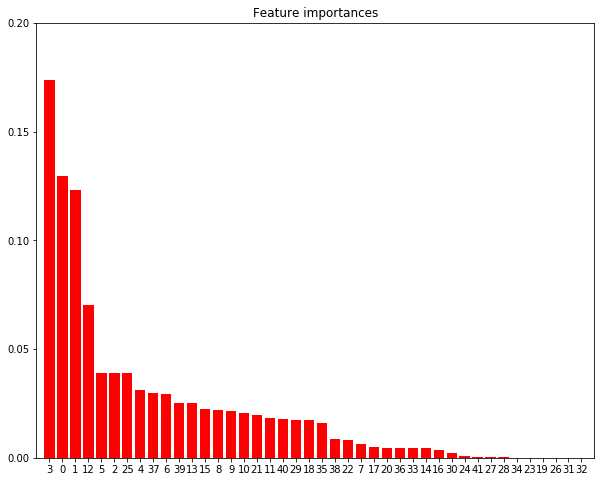

In [95]:
#plot distribution of importance

importances = sel.estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.yticks([0,0.05,0.1,0.15,0.2])
plt.show()

In [76]:
'''
Lets define our new feature set with the ones that have importance greater than
the mean importance with the exceptions of 'CT_Angles', ‘sig_loc’,
'JT_Mid-Block (but intersection related)', 'JT_Mid-Block (not related to intersection)' 
, & 'CT_Head On'
'''

sigFeatures = df[['PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INATTENTIONIND','CT_Angles','sig_loc'
                  ,'JT_Mid-Block (but intersection related)','JT_Mid-Block (not related to intersection)',
                  'CT_Head On', 'UNDERINFL', 'SPEEDING', 'CT_Parked Car', 'CT_Rear Ended',
                  'CT_Sideswipe', 'W_Overcast','JT_At Intersection (intersection related)']]

X1 = sigFeatures
X1[0:5]

,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,CT_Angles,sig_loc,JT_Mid-Block (but intersection related),JT_Mid-Block (not related to intersection),CT_Head On,UNDERINFL,SPEEDING,CT_Parked Car,CT_Rear Ended,CT_Sideswipe,W_Overcast,JT_At Intersection (intersection related)
0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1
1,4,0,1,2,0,0,0,0,1,0,0,0,0,0,0,0,0
2,3,0,0,2,0,0,0,0,0,0,0,1,0,1,0,0,1
3,3,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,1
4,3,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,1


In [77]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y, test_size = 0.2, random_state = 45)
print ('Train set:', X_train1.shape,  y_train1.shape)
print ('Test set:', X_test1.shape,  y_test1.shape)

Train set: (4368, 17) (4368,)
Test set: (1092, 17) (1092,)


In [99]:
X1 = preprocessing.StandardScaler().fit(X1).transform(X1)

In [78]:
#Lets select the best hyperparameters for RFC
rfc = RandomForestClassifier()

from pprint import pprint
print('Parameters currently in use:\n')
pprint(rfc.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [101]:
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [102]:
#Use the random grid to search for best hyperparameters
# First create the base model to tune

RFC = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
RFC_random = RandomizedSearchCV(estimator = RFC, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=45, n_jobs = -1)

# Fit the random search model
RFC_random.fit(X_train1, y_train1)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  7.0min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [104]:
RFC_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

In [107]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': ['auto'],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [600, 800, 1000, 1200]
}


In [113]:
RFC = RandomForestClassifier(random_state = 45)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = RFC, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train1, y_train1)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   55.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:  8.9min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=45,
                                  

In [114]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 600}

In [79]:
#now that we have our hyperparameters lets build the model
RFC2 = RandomForestClassifier(n_estimators= 600,min_samples_split= 10,min_samples_leaf = 4, max_features= 'auto', max_depth = 80,bootstrap=True, random_state = 45)
RFC2.fit(X_train1,y_train1)
RFC2.score(X_train1,y_train1)

0.7907509157509157

In [80]:
RFC2_y_hat = RFC2.predict(X_test1)

              precision    recall  f1-score   support

           0       0.75      0.84      0.79       532
           1       0.83      0.74      0.78       560

    accuracy                           0.79      1092
   macro avg       0.79      0.79      0.79      1092
weighted avg       0.79      0.79      0.79      1092

Normalized confusion matrix
[[0.84 0.16]
 [0.26 0.74]]


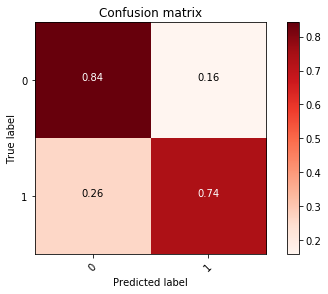

In [119]:
cnf_matrix = confusion_matrix(y_test1, RFC2_y_hat)
np.set_printoptions(precision=2)


print (classification_report(y_test1, RFC2_y_hat))
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=df["SEVERITYCODE"].unique().tolist(),normalize= True,  title='Confusion matrix')

In [115]:
jc = round(jaccard_similarity_score(y_test1, RFC2_y_hat), 2)
print(jc)
RFC2

0.78


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=1800,
                       n_jobs=None, oob_score=False, random_state=45, verbose=0,
                       warm_start=False)

In [120]:
from sklearn.model_selection import learning_curve

/Users/Dillon/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


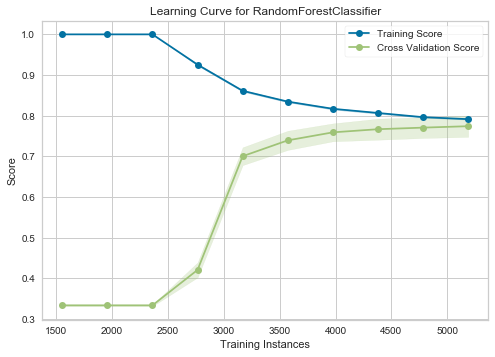

In [121]:
from yellowbrick.model_selection import LearningCurve
from sklearn.model_selection import StratifiedKFold

#Create the learning curve visualizer
cv = StratifiedKFold(n_splits=20)
sizes = np.linspace(0.3, 1.0, 10)

# Instantiate the classification model and visualizer
model = RFC2
visualizer = LearningCurve(
    model, cv=cv, scoring='f1_weighted', train_sizes=sizes, n_jobs=-1
)
# Fit the data to the visualizer
visualizer.fit(X1, Y)        
visualizer.show()     

In [2]:
# The model does not suffer from error due to bias, since there is no variability around the training score curve.
# The model suffers from error due to variance, since there is more variability around the cross validated score.
# The model has convergred, so it would not benefit from more training data
